# Lab: Model Comparison and Evaluation for Loan Repayment Prediction

### Objective:
In this lab, you will analyze and evaluate the performance of two machine learning models—**Decision Tree** and **Random Forest**—for predicting whether a loan will be fully paid or not. You will compare the models based on various metrics such as accuracy, precision, recall, F1-score, and confusion matrices. This lab will help you understand the importance of model evaluation and the implications of class imbalance on model performance.

### Instructions:
1. **Load and Explore the Data**: Start by loading the loan dataset and performing some basic exploratory data analysis.
2. **Train Decision Tree and Random Forest Models**: Build a Decision Tree and a Random Forest model to predict whether a loan will be fully paid or not.
3. **Evaluate Model Performance**: Use classification metrics and confusion matrices to evaluate the performance of both models.
4. **Compare the Models**: Analyze the results to determine which model performed better and why.
5. **Critical Thinking Questions**: Answer questions to reflect on the model performance and potential improvements.

### Dataset:
You will use a dataset named `loan_data.csv`, which contains information about loans, including whether they were fully paid or not. The target variable is `not.fully.paid`.

The dataset is from the Lending Club (www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.


---

## Section 1: Data Exploration

### Step 1.1: Load the Dataset
1. Load the `loan_data.csv` file into a Pandas DataFrame.
2. Display basic information about the dataset using `.info()`, `.head()`, and `.describe()`.`, and `.describe()`.

In [1]:
import pandas as pd


file_path = r'C:\Users\William\Desktop\Decision Trees and Random Forest Assignment\data\loan_data.csv'
loan_data = pd.read_csv(file_path)


print("Dataset Information:")
print(loan_data.info())

print("\nFirst 5 Rows of the Dataset:")
print(loan_data.head())

print("\nStatistical Summary of the Dataset:")
print(loan_data.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None

First 5 Rows of the Dataset:
   cred

### Step 1.2: Exploratory Data Analysis (EDA)
- **Create** histograms to visualize the distribution of FICO scores for loans based on the `credit.policy` and `not.fully.paid` variables.
- **Create** a count plot to visualize the purpose of the loans and their repayment status.

See samples below. Don't worry about matching the color or desing.

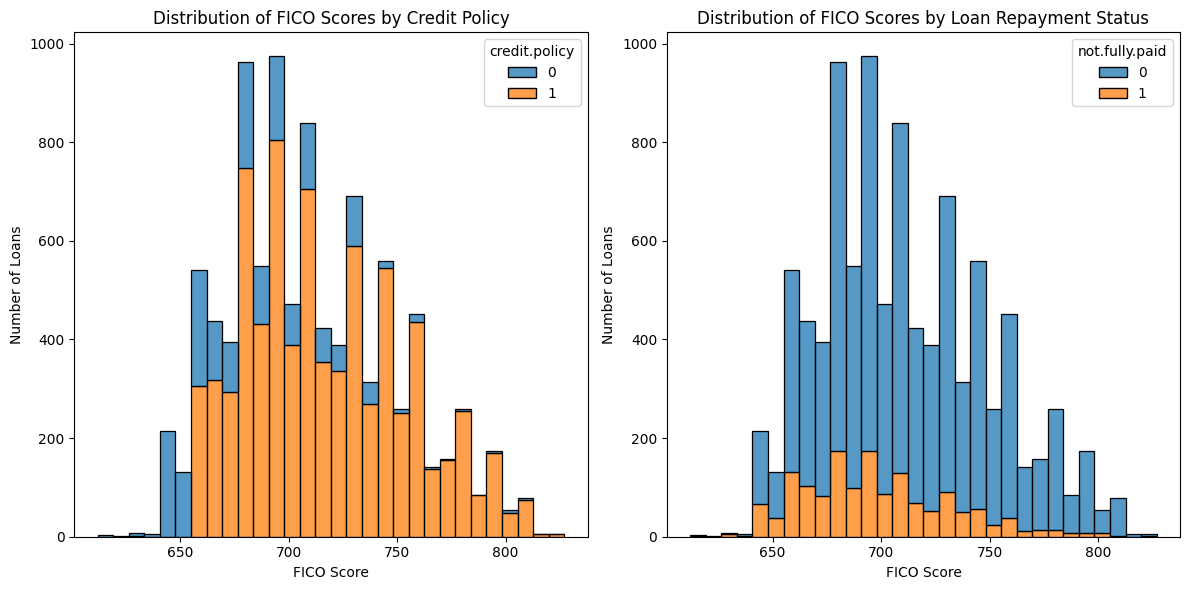

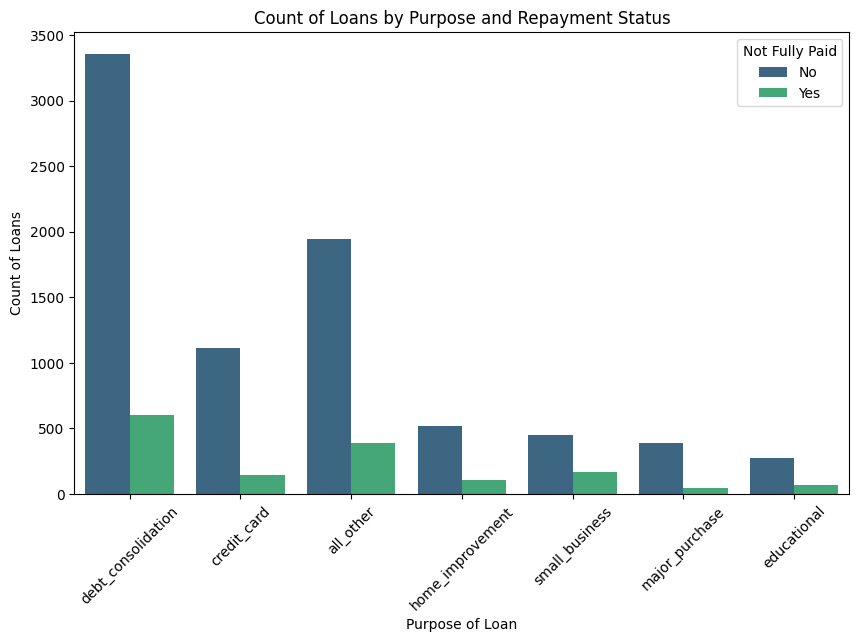

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Ensure pandas is imported if you're using it


# Histogram of FICO scores based on credit.policy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.histplot(data=loan_data, x='fico', hue='credit.policy', multiple='stack', bins=30)
plt.title('Distribution of FICO Scores by Credit Policy')
plt.xlabel('FICO Score')
plt.ylabel('Number of Loans')

# Histogram of FICO scores based on not.fully.paid
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.histplot(data=loan_data, x='fico', hue='not.fully.paid', multiple='stack', bins=30)
plt.title('Distribution of FICO Scores by Loan Repayment Status')
plt.xlabel('FICO Score')
plt.ylabel('Number of Loans')

plt.tight_layout()
plt.show()

# Count plot for the purpose of the loans and their repayment status
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data, x='purpose', hue='not.fully.paid', palette='viridis')
plt.title('Count of Loans by Purpose and Repayment Status')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count of Loans')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.legend(title='Not Fully Paid', loc='upper right', labels=['No', 'Yes'])
plt.show()


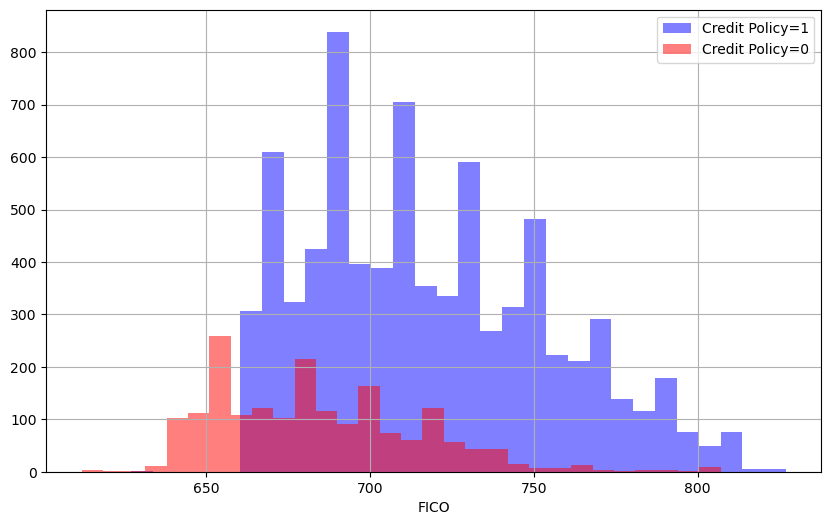

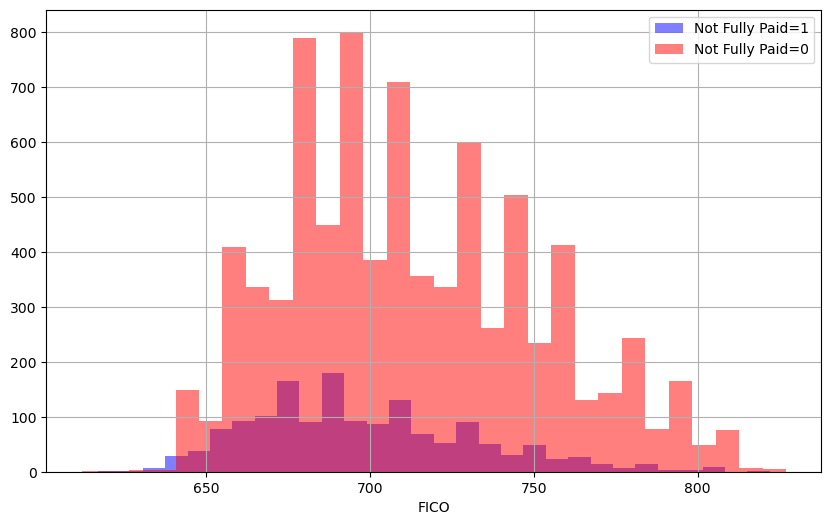

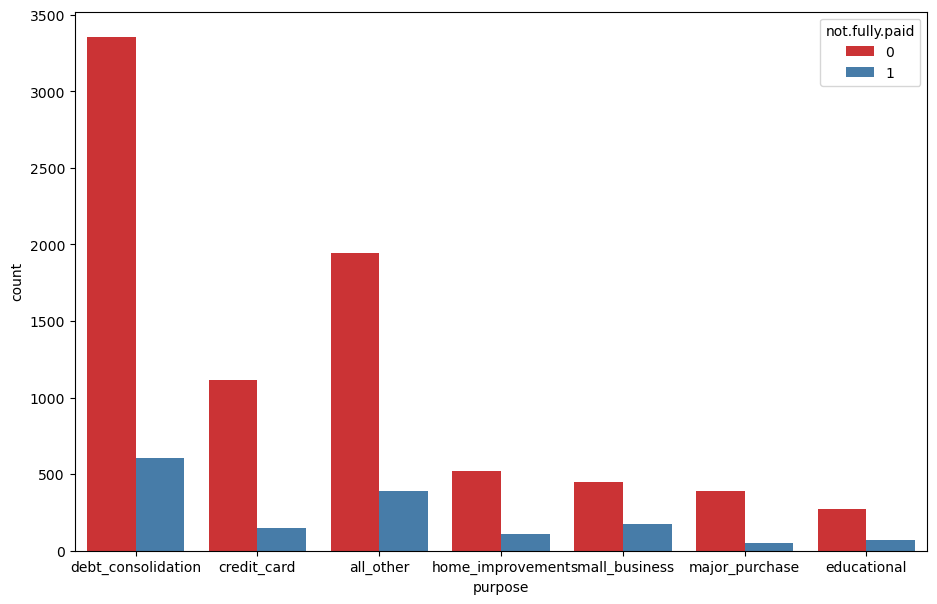

## Section 2: Model Training and Evaluation
### Step 2.1: Preparing Data for Machine Learning
- **Convert** the `purpose` column to dummy variables using `pd.get_dummies()`.
- **Split** the data into training and test sets using `train_test_split()`.
- use test_size=0.30, random_state=101

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split


loan_data_dummies = pd.get_dummies(loan_data, columns=['purpose'], drop_first=True)


X = loan_data_dummies.drop('not.fully.paid', axis=1)
y = loan_data_dummies['not.fully.paid']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (6704, 18) (6704,)
Test set shape: (2874, 18) (2874,)


### Step 2.2: Train a Decision Tree Model
- **Train** a `DecisionTreeClassifier` on the training data.
- **Evaluate** the model on the test data using a classification report and confusion matrix.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Train the Decision Tree Model
dt_classifier = DecisionTreeClassifier(random_state=101)  
dt_classifier.fit(X_train, y_train)

# Step 2: Make Predictions
y_pred = dt_classifier.predict(X_test)

# Step 3: Evaluate the Model
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.72      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.72      0.74      2874

Confusion Matrix:
[[1975  456]
 [ 336  107]]


### Step 2.3: Train a Random Forest Model
- **Train** a `RandomForestClassifier` on the training data.
- **Evaluate** the model on the test data using a classification report and confusion matrix.

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Train the Random Forest Model
rf_classifier = RandomForestClassifier(random_state=101)  
rf_classifier.fit(X_train, y_train)

# Step 2: Make Predictions
y_pred_rf = rf_classifier.predict(X_test)

# Step 3: Evaluate the Model
# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874

Random Forest Confusion Matrix:
[[2422    9]
 [ 433   10]]


## Section 3: Model Comparison and Critical Thinking

### Step 3.1: Compare the Models
- **Compare** the classification reports and confusion matrices of both models.
- **Discuss** which model performs better based on your evaluation.

**Answer the questions below**

**Questions for Model Comparison:**
1. Which model has a higher overall accuracy, and what does this tell you about its performance?
2. Which model is better at identifying loans that are not fully paid (class `1`)?
3. How does class imbalance affect the performance of these models?
4. What steps can you take to improve the performance of these models, especially for class `1`?

1. **Which model has a higher overall accuracy, and what does this tell you about its performance?**

The Random Forest model has a higher overall accuracy (85%) compared to the Decision Tree model (72%). While higher accuracy is generally a good indicator of model performance, it doesn't provide a complete picture, especially in the context of class imbalance.

2. **Which model is better at identifying loans that are not fully paid (class `1`)?**

The Decision Tree model is better at identifying loans that are not fully paid (class 1) with a precision of 19% and recall of 24%. In contrast, the Random Forest model shows poor performance in this aspect, with a precision of 53% but a significantly low recall of 2%. This means the Random Forest model is misclassifying most of the class 1 instances, failing to identify many loans that are not fully paid.

3. **How does class imbalance affect the performance of these models?**

Class imbalance can lead to models being biased towards the majority class (class 0 in this case). As seen in both models, the performance metrics for class 1 (not fully paid) are considerably lower than for class 0. The Random Forest model, despite its higher accuracy, fails to detect many instances of class 1 due to its bias toward the majority class.

### Step 3.2: Reflection
- Write a short reflection (2-3 sentences) on what you learned from this lab. What were the main challenges in comparing the models, and how did you address them?

**Reflection:**

In this lab, I learned the importance of evaluating models beyond just accuracy, especially in the context of class imbalance, as it can significantly affect performance metrics. One of the main challenges in comparing the models was understanding how different metrics, such as precision and recall, influence the interpretation of model performance. To address this, I carefully analyzed the classification reports and confusion matrices, which helped me identify the strengths and weaknesses of each model and provided insights into potential improvements for detecting the minority class.